## Load Data - 약물 분류 데이터


In [2]:
import pandas as pd
import numpy as np

x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_test.csv")


display(x_train.head())
display(y_train.head())

,ID,Age,Sex,BP,Cholesterol,Na_to_K
0,0,36,F,NORMAL,HIGH,16.753
1,1,47,F,LOW,HIGH,11.767
2,2,69,F,NORMAL,HIGH,10.065
3,3,35,M,LOW,NORMAL,9.170
4,4,49,M,LOW,NORMAL,11.014


,ID,Drug
0,0,0
1,1,3
2,2,4
3,3,4
4,4,4


## EDA


In [3]:
x_train.shape

(157, 6)

In [4]:
x_test.shape

(43, 6)

In [5]:
y_train['Drug'].value_counts()

0    72
4    43
1    18
3    12
2    12
Name: Drug, dtype: int64

In [6]:
x_train.isnull().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [7]:
x_test.isnull().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           157 non-null    int64  
 1   Age          157 non-null    int64  
 2   Sex          157 non-null    object 
 3   BP           157 non-null    object 
 4   Cholesterol  157 non-null    object 
 5   Na_to_K      157 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.5+ KB


In [9]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           43 non-null     int64  
 1   Age          43 non-null     int64  
 2   Sex          43 non-null     object 
 3   BP           43 non-null     object 
 4   Cholesterol  43 non-null     object 
 5   Na_to_K      43 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB


In [10]:
y = y_train['Drug']

In [11]:
x_train.select_dtypes('number').columns

Index(['ID', 'Age', 'Na_to_K'], dtype='object')

In [12]:
x_train.select_dtypes('object').columns

Index(['Sex', 'BP', 'Cholesterol'], dtype='object')

In [13]:
num_col = ['Age', 'Na_to_K']

In [14]:
cat_col = ['Sex', 'BP', 'Cholesterol']

## Data Preprocessing - StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[num_col])
train_scaled = scaler.transform(x_train[num_col])
test_scaled = scaler.transform(x_test[num_col])
print(train_scaled.shape, test_scaled.shape)

(157, 2) (43, 2)


## Data Preprocessing - OneHotEncoder


*   pd.get_dummies vs OneHotEncoder
*   https://url.kr/gjif3r



In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(x_train[cat_col])
train_encoded = encoder.transform(x_train[cat_col])
test_encoded = encoder.transform(x_test[cat_col])
print(train_encoded.shape, test_encoded.shape)

(157, 7) (43, 7)


## Make DataFrame

In [17]:
train_scaled_df = pd.DataFrame(train_scaled,columns=x_train[num_col].columns)
test_scaled_df = pd.DataFrame(test_scaled,columns=x_test[num_col].columns)
train_scaled_df.head()

,Age,Na_to_K
0,-0.494654,0.122515
1,0.174310,-0.597076
2,1.512238,-0.842713
3,-0.555469,-0.971882
4,0.295940,-0.705751


In [18]:
train_encoded_df = pd.DataFrame(train_encoded,columns=encoder.get_feature_names_out())
test_encoded_df = pd.DataFrame(test_encoded,columns=encoder.get_feature_names_out())
train_encoded_df.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Concat scaled dataframe and encoded dataframe

In [19]:
train_concat = pd.concat([train_scaled_df,train_encoded_df],axis=1)
test_concat = pd.concat([test_scaled_df,test_encoded_df],axis=1)
display(train_concat.head())
print(train_concat.shape, test_concat.shape)

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-0.494654,0.122515,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.174310,-0.597076,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.512238,-0.842713,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.555469,-0.971882,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.295940,-0.705751,0.0,1.0,0.0,1.0,0.0,0.0,1.0


(157, 9) (43, 9)


## Dimensionality Reduction - PCA
* PCA vs t-SNE vs UMAP
* https://kwonkai.tistory.com/65





* 그래프를 그리면 알 수 있는 것
* 정말 두개 컬럼이 상관없는지
* class마다 점이 잘 분리가 되었는지
* 점들간에 분리가 잘 될수록  차원축소가 잘 된 것

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_concat)
train_pca = pca.transform(train_concat)
test_pca = pca.transform(test_concat)

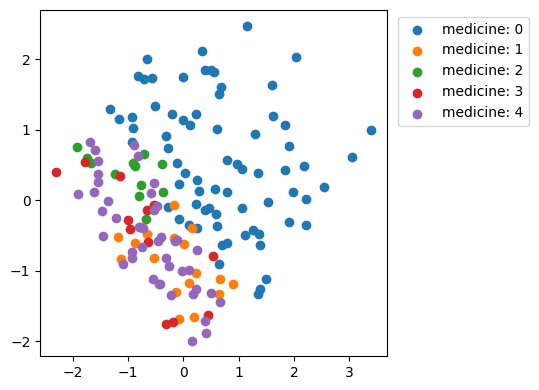

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
for label in sorted(y.unique()):
    plt.scatter(train_pca[y == label, 0], train_pca[y == label, 1], label='medicine: {}'.format(label))
plt.legend(loc='upper right', bbox_to_anchor=(1.43, 1))
plt.tight_layout()
plt.show()

## Dimensionality Reduction - t-SNE
* PCA후에 t-sne나 UMAP을 해야하는 이유
* 계산 효율성을 높이고, 데이터의 노이즈를 줄이며, t-SNE나 UMAP의 결과를 개선하는 데 도움을 줄 수 있다.




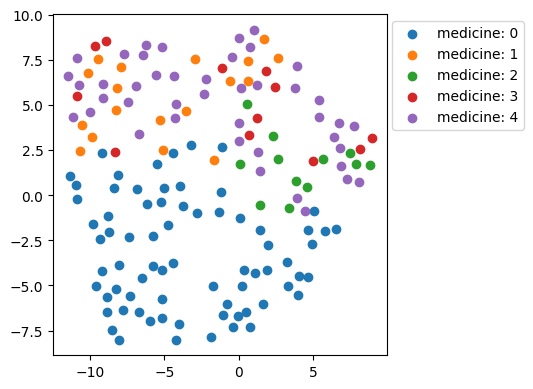

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30.0, random_state=10, n_iter=1000)
train_tsne = tsne.fit_transform(train_pca)

plt.figure(figsize=(6, 4))
for label in sorted(y.unique()):
    plt.scatter(train_tsne[y == label, 0], train_tsne[y == label, 1], label='medicine: {}'.format(label))
plt.legend(loc='upper right', bbox_to_anchor=(1.43, 1))
plt.tight_layout()
plt.show()

## Dimensionality Reduction - UMAP

In [23]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 488.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=95fb855dc7784a80649ea5f84ffca9b9e79825cdbccffd090b5bc1d57bb69483
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


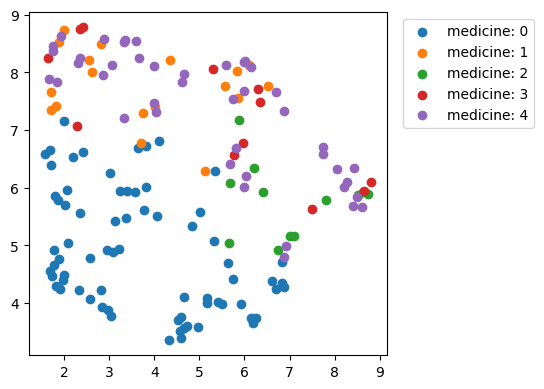

In [24]:
import umap
umap_model = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, random_state=100)
train_umap = umap_model.fit_transform(train_pca)

plt.figure(figsize=(6, 4))
for label in sorted(y.unique()):
    plt.scatter(train_umap[y == label, 0], train_umap[y == label, 1], label='medicine: {}'.format(label))
plt.legend(loc='upper right', bbox_to_anchor=(1.43, 1))
plt.tight_layout()
plt.show()

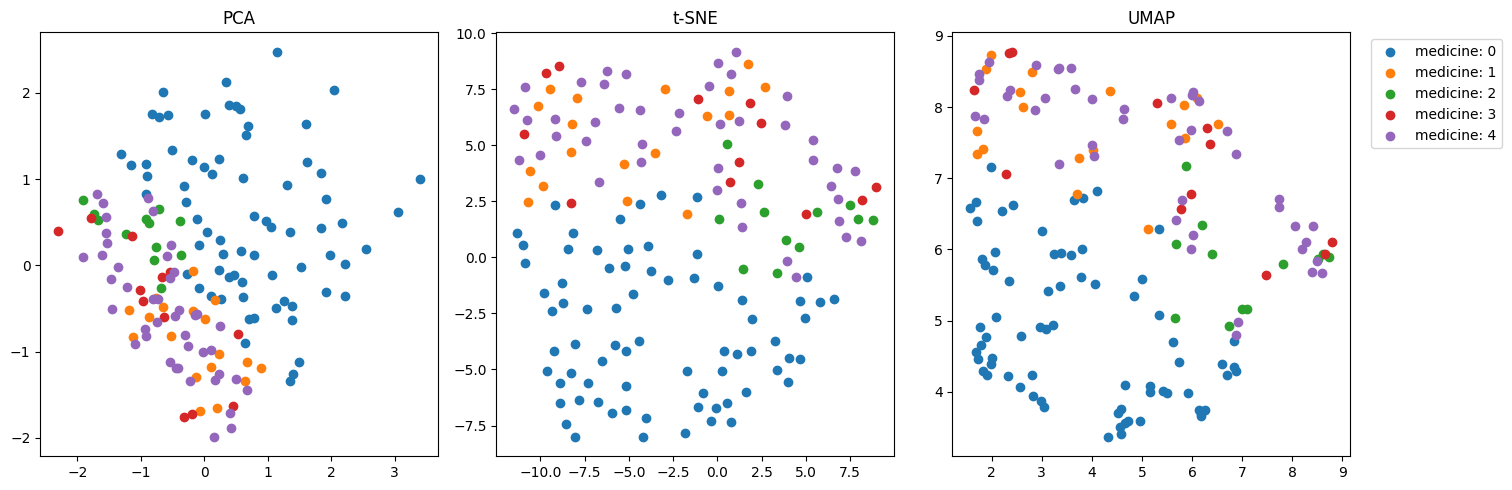

In [25]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

axes[0].set_title('PCA')
for label in sorted(y.unique()):
    axes[0].scatter(train_pca[y == label, 0], train_pca[y == label, 1])

axes[1].set_title('t-SNE')
for label in sorted(y.unique()):
    axes[1].scatter(train_tsne[y == label, 0], train_tsne[y == label, 1])

axes[2].set_title('UMAP')
for label in sorted(y.unique()):
    axes[2].scatter(train_umap[y == label, 0], train_umap[y == label, 1],label='medicine: {}'.format(label))

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

* 이 약물분류데이터는 데이터의 크기가 작아서

* 사실 차원축소가 필요없다.

* 이 산점도가 예상대로 그려지지 않은 이유도 그 이유 때문이다.

* t-SNE, UMAP도 마찬가지다.

* 데이터의 크기가 작으므로 test_pca의 target데이터가 없어

* test가 점이 어떻게 찍히는지 알 수 없다.

* 물론 또 쪼개면 되긴 하는데 너무 작아서 생략했다.

## Data Split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_valid , y_train, y_valid = train_test_split(train_pca,y,test_size=0.2,random_state=1000)

## Modeling & Scoring - RandomForestClassifier


* 이 데이터는 target이 binary하지 않고 multi class이기 때문에 score들을 구할 때 주의해야한다.

* https://data-minggeul.tistory.com/11 이 사이트를 참조해서 macro, micro, weighted의 차이점을 알아야한다.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
val_pred = rf.predict(x_valid)
val_pred_ratio = rf.predict_proba(x_valid)

print('accuracy_score: {}'.format(accuracy_score(y_valid,val_pred)))
print('f1_score: {}'.format(f1_score(y_valid,val_pred,average='macro')))
print('recall_score: {}'.format(recall_score(y_valid,val_pred,average='macro')))
print('precision_score: {}'.format(precision_score(y_valid,val_pred,average='macro')))
print('roc_auc_score: {}'.format(roc_auc_score(y_valid,val_pred_ratio,multi_class='ovr')))

accuracy_score: 0.6875
f1_score: 0.4061191626409018
recall_score: 0.4205128205128205
precision_score: 0.3928571428571429
roc_auc_score: 0.7677540098164621


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

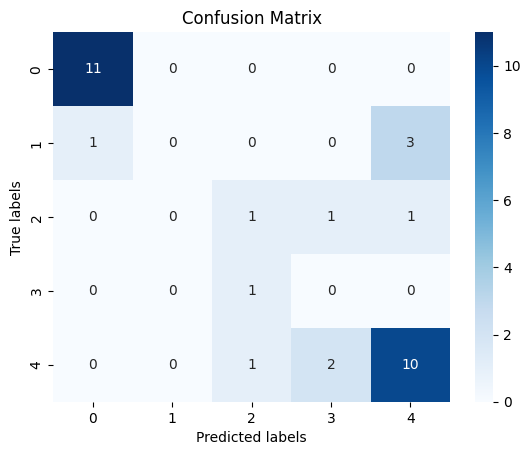

In [28]:
cm = confusion_matrix(y_valid, val_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

* 대각선이 숫자가 높아야 잘 분류되었다고 할 수 있는데
* 지금의 경우 medicine: 0 과 medicined: 4는 각각 11과 8이고
* 옆에 색깔을 확인해보면
* 아주 잘 분류되었음을 알 수 있다.
* 나머지는 잘 분류되지 않았다.

## Predict - RandomForestClassifier

In [29]:
pred1 = rf.predict(test_pca)
df1 = pd.DataFrame({'pred':pred1})
df1.to_csv('00000.csv',index=False)
df1.head()

,pred
0,0
1,4
2,1
3,4
4,0


## Modeling - XGBClassifier

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.2, n_estimators=1000, tree_method = 'gpu_hist')
xgb.fit(x_train,y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=100, verbose = 100)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:58:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.44679
[100]	validation_0-mlogloss:1.12863
[115]	validation_0-mlogloss:1.13639


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Predict - XGBoost

In [31]:
pred2 = xgb.predict(test_pca)
df2 = pd.DataFrame({'pred':pred2})
df2.to_csv('11111.csv',index=False)
df2.head()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:58:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:58:20] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


,pred
0,0
1,4
2,1
3,3
4,0
